In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [2]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


### Upper Confidence Algorithm

In [25]:
import math
N = 10000 # Number of experiment 
d = 10     # number of samples
sample_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    sample = 0 
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            sample = i
    sample_selected.append(sample)
    numbers_of_selections[sample] = numbers_of_selections[sample] + 1
    reward = data.values[n, sample]
    sums_of_rewards[sample] = sums_of_rewards[sample] + reward
    total_reward = total_reward + reward

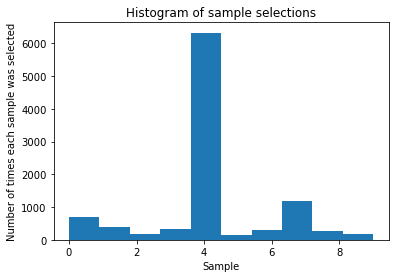

In [26]:
plt.hist(sample_selected)
plt.title('Histogram of sample selections')
plt.xlabel('Sample')
plt.ylabel('Number of times each sample was selected')
plt.show()